## **Importing libraries**

In [294]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
import plotly.express as exp
import plotly.express as px


# Loading the dataset
data = pd.read_csv('/content/Country-data.csv')


## **Exploratory Data Analysis** 

In [295]:
# Displaying the first five rows of the dataset
data.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [296]:
# Displaying the shape of the dataset
data.shape


(167, 10)

## **Data Preprocessing and Visualisation**

In [297]:
# Converting exports, health, and imports columns from percentages to actual values
data['exports'] = data['exports']*data['gdpp']/100
data['health'] = data['health']*data['gdpp']/100
data['imports'] = data['imports']*data['gdpp']/100

In [298]:
# Displaying the summary of the dataset
data.describe()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [299]:
# Checking for missing values
data.isnull().sum()


country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

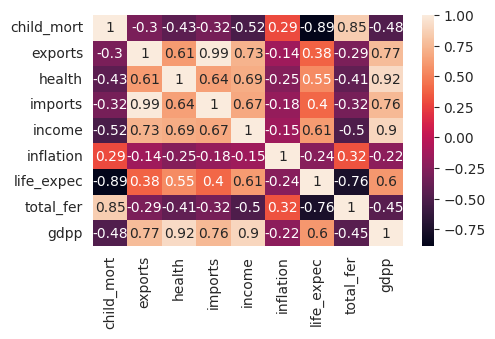

In [300]:
# Visualizing the correlation between the features
plt.figure(figsize=(5,3))
sns.heatmap(data.corr(), annot=True)
plt.show()


In [301]:
plot = px.choropleth(data,
                    locationmode='country names',
                    locations='country',
                    color='gdpp',
                    title='Countries by gdpp'
                   )
plot.show()

In [302]:
plot = px.choropleth(data,
                    locationmode='country names',
                    locations='country',
                    color='income',
                    title='Countries by income'
                   )
plot.show()

In [303]:
fig = px.choropleth(data,
                    locationmode='country names',
                    locations='country',
                    color='health',
                    title='Countries by health'
                   )
fig.show()

In [305]:
exp.scatter(data_frame=data,x = 'child_mort',y = 'health',color='country')


In [332]:
exp.scatter(data_frame=data,x = 'child_mort',y = 'income',color='country')


In [333]:
exp.scatter(data_frame=data,x = 'child_mort',y = 'gdpp',color='country')


In [306]:
# Removing the unnecessary columns
data = data.drop(['country'], axis=1)


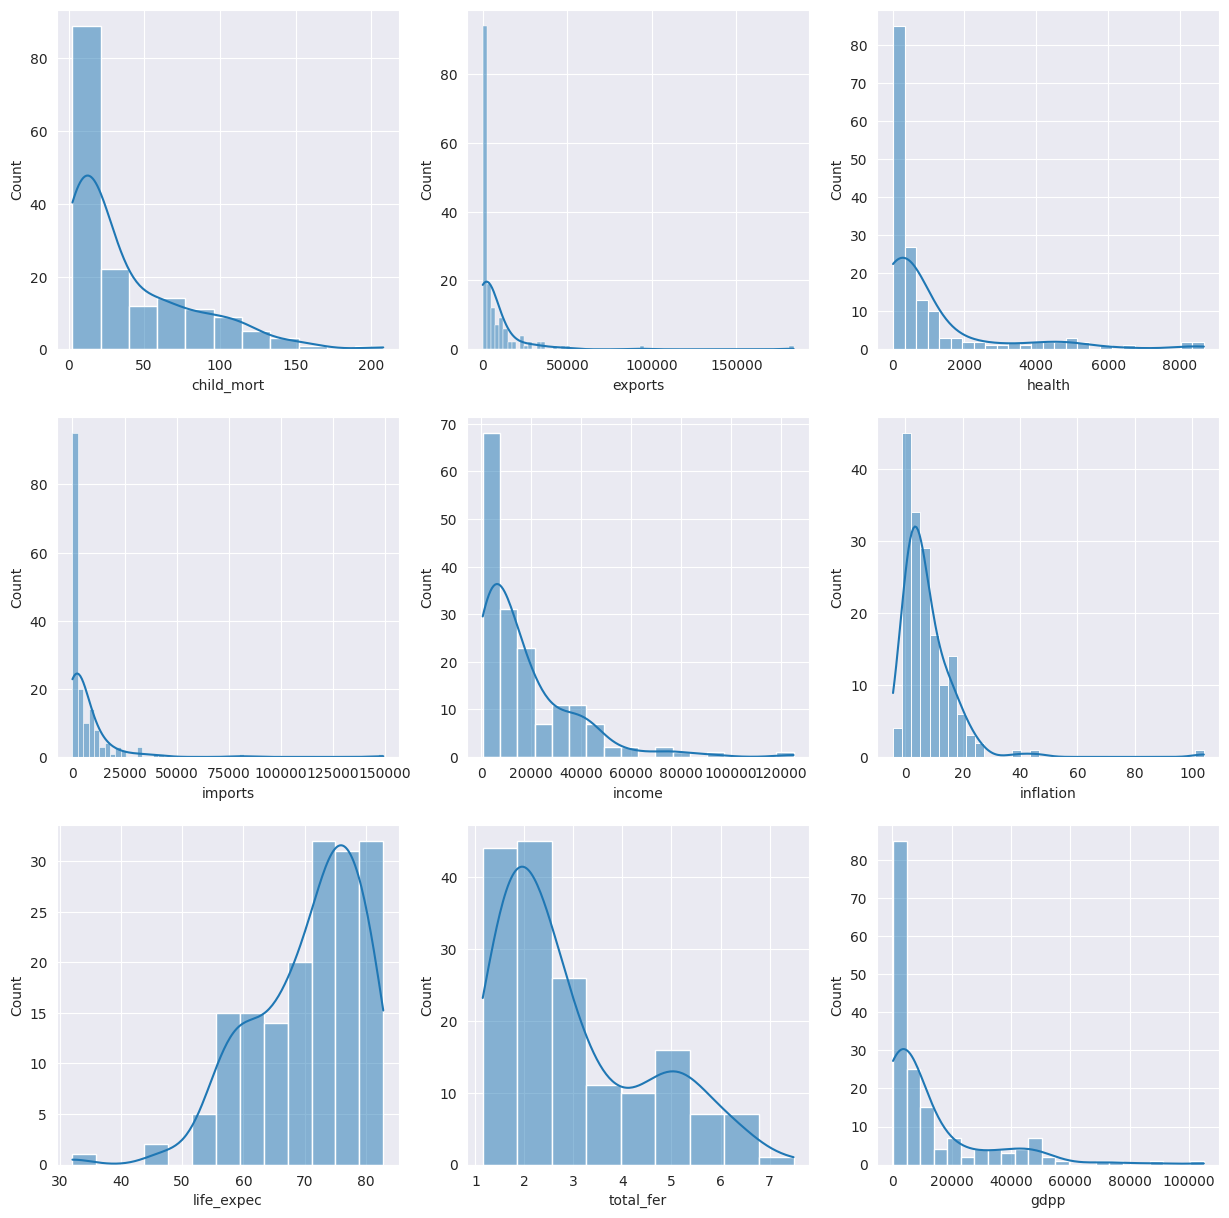

In [307]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 15))
for i, column in enumerate(data.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[column], kde=True)
plt.show()


In [308]:
# Normalizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


In [309]:
# Creating a dataframe from the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
scaled_df.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## **Dimensionality Reduction using PCA**

In [310]:
import numpy as np
from sklearn.decomposition import PCA

# instantiate a PCA object
pca = PCA()

# fit the PCA model to the data
pca.fit(data)

# calculate the explained variance ratio and the cumulative explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# set the desired percentage of variance to retain
percentage_to_retain = 0.95

# find the number of components needed to retain the desired percentage of variance
n_components = np.argmax(cumulative_variance_ratio >= percentage_to_retain) + 1

# print the number of components needed
print("Number of components needed to retain {}% of variance: {}".format(percentage_to_retain*100, n_components))

Number of components needed to retain 95.0% of variance: 2


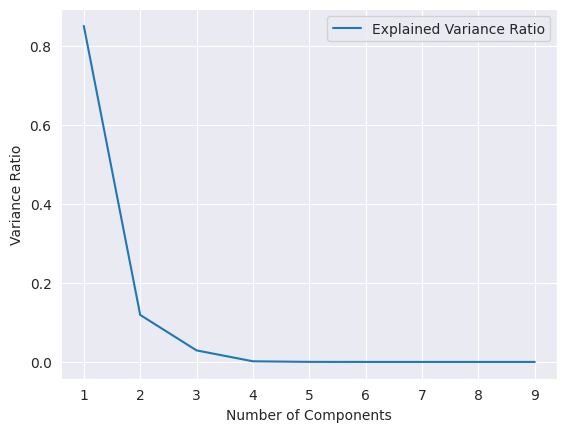

In [311]:
# create a line plot of the explained variance ratio 
plt.plot(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, label='Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Variance Ratio')
plt.legend()
plt.show()

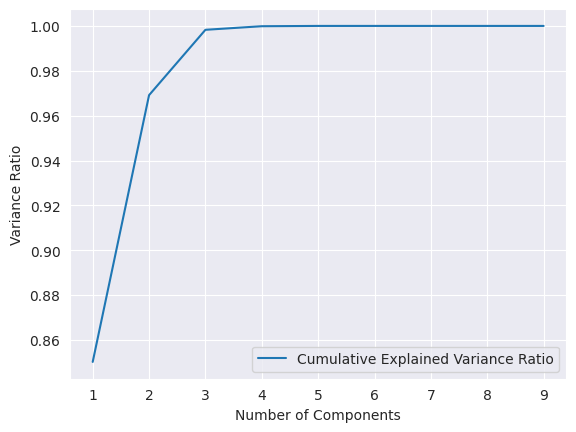

In [312]:
# create a line plot of the cumulative explained variance ratio
plt.plot(range(1, len(cumulative_variance_ratio)+1), cumulative_variance_ratio, label='Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Variance Ratio')
plt.legend()
plt.show()

In [313]:
# Performing PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled_data)

# Creating a dataframe from the PCA data
pca_df = pd.DataFrame(data_pca)
pca_df.head()

,0,1
0,-2.635575,1.472267
1,-0.024206,-1.429892
2,-0.459557,-0.675495
3,-2.722630,2.172332
4,0.648597,-1.023437


## **Hyperparameter Tuning**

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

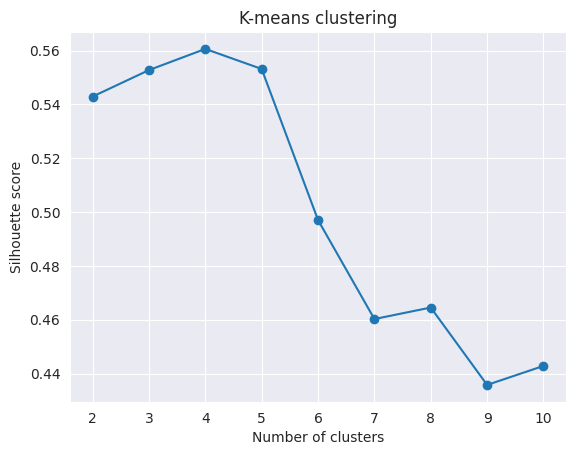

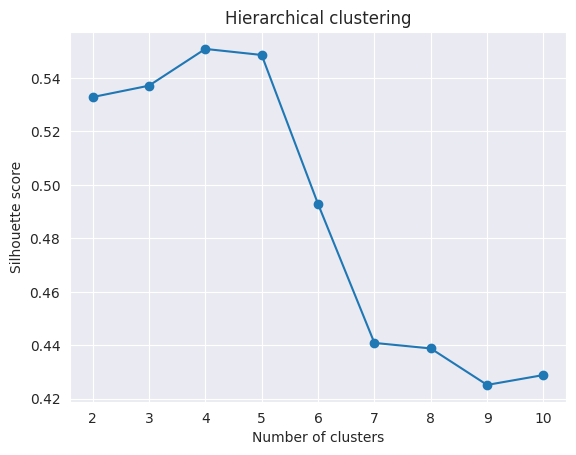

DBSCAN with eps=0.1, min_samples=2: 0.014225478606505302
DBSCAN with eps=0.1, min_samples=3: -0.08863854069982025
DBSCAN with eps=0.1, min_samples=5: -0.32246876552939263
Not enough clusters with eps=0.1, min_samples=10
DBSCAN with eps=0.5, min_samples=2: -0.1295751252645421
DBSCAN with eps=0.5, min_samples=3: 0.5366503528315881
DBSCAN with eps=0.5, min_samples=5: 0.5223891442454546
DBSCAN with eps=0.5, min_samples=10: 0.49837980855234787
DBSCAN with eps=1.0, min_samples=2: 0.4192495349452225
DBSCAN with eps=1.0, min_samples=3: 0.6152387457028691
DBSCAN with eps=1.0, min_samples=5: 0.6123948608684017
DBSCAN with eps=1.0, min_samples=10: 0.5953243908406998


In [314]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Creating a dataframe for the PCA results
pca_df = pd.DataFrame(data=data_pca, columns=['PCA1', 'PCA2'])
pca_df.head()


# perform k-means clustering with different number of clusters
k_values = range(2, 11)
k_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    labels = kmeans.labels_
    score = silhouette_score(data_pca, labels)
    k_scores.append(score)

# plot the silhouette scores for different number of clusters
plt.plot(k_values, k_scores, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('K-means clustering')
plt.show()

# perform hierarchical clustering with different number of clusters
h_values = range(2, 11)
h_scores = []
for h in h_values:
    hierarchical = AgglomerativeClustering(n_clusters=h)
    hierarchical.fit(data_pca)
    labels = hierarchical.labels_
    score = silhouette_score(data_pca, labels)
    h_scores.append(score)

# plot the silhouette scores for different number of clusters
plt.plot(h_values, h_scores, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Hierarchical clustering')
plt.show()

# perform DBSCAN clustering with different values of eps
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# define the hyperparameters to tune
eps_values = [0.1, 0.5, 1.0]
min_samples_values = [2,3, 5, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        try:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(data_pca)
            labels = dbscan.labels_
            if len(set(labels)) > 1:
                score = silhouette_score(data_pca, labels)
                print(f"DBSCAN with eps={eps}, min_samples={min_samples}: {score}")
            else:
                print(f"Not enough clusters with eps={eps}, min_samples={min_samples}")
        except Exception as e:
            print(f"Error with eps={eps}, min_samples={min_samples}: {str(e)}")

## **KMeans Clustering**

In [315]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(data_pca)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=42)

## **Hierarchical clustering**

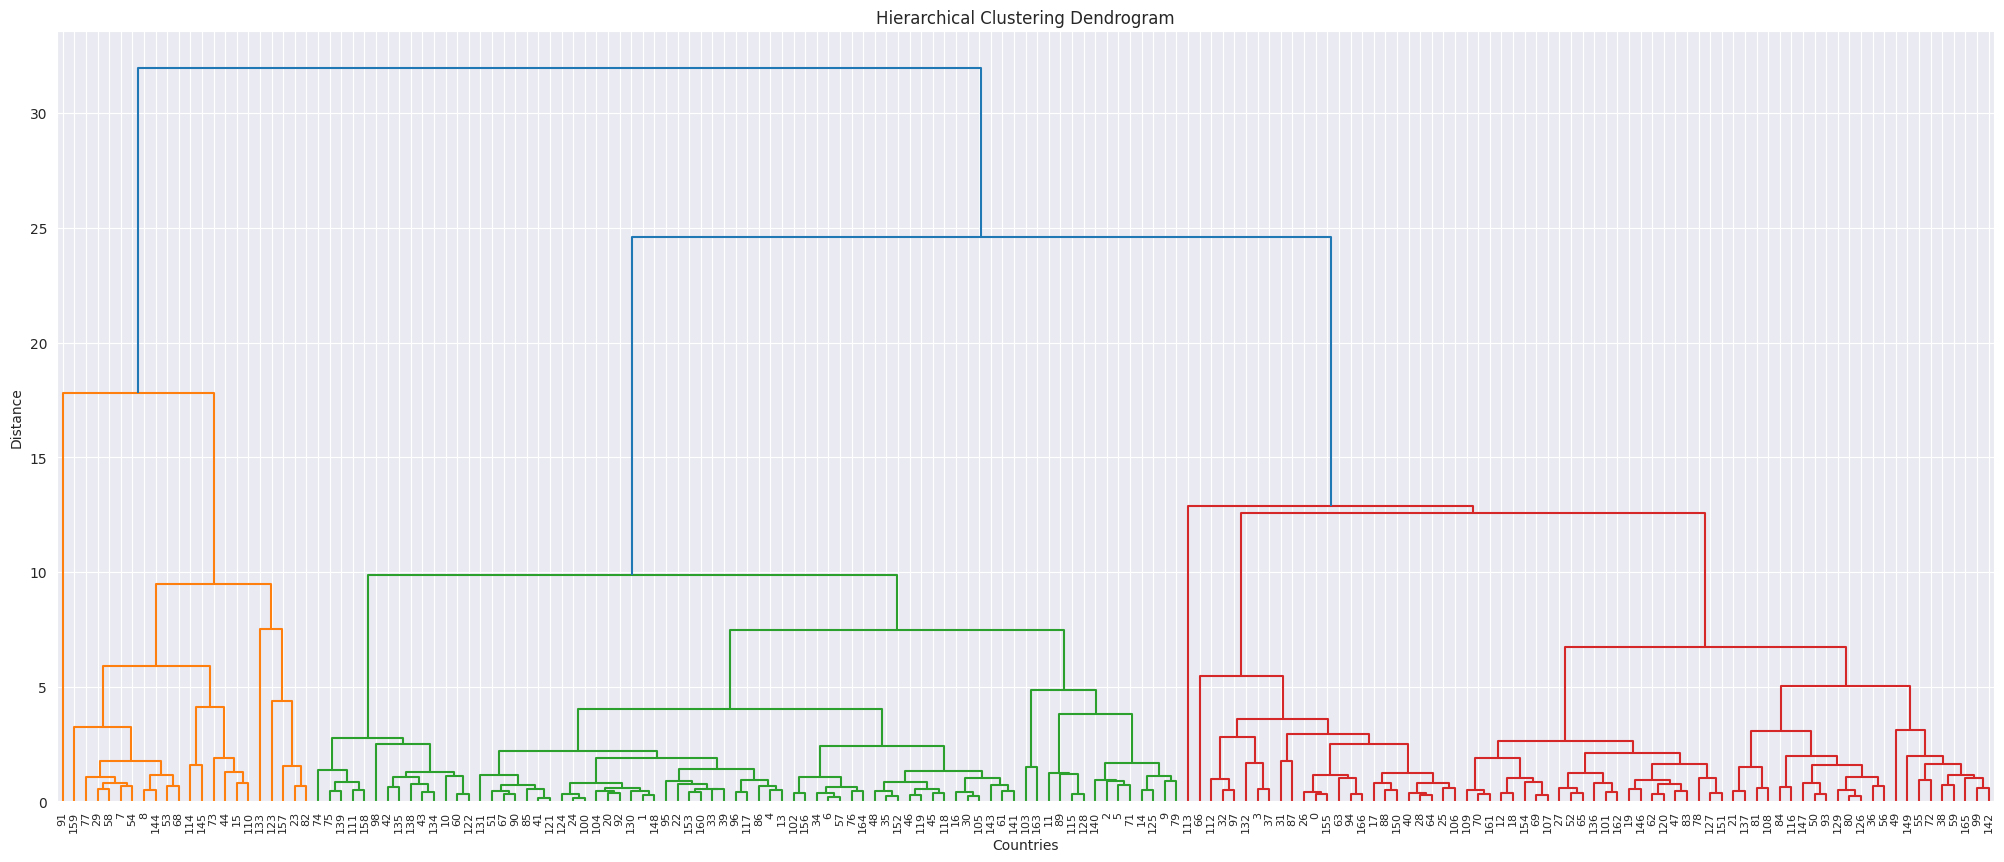

In [316]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Perform hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')
hierarchical.fit(data_pca)

# Compute the linkage matrix
Z = linkage(scaled_data, method='ward')

# Visualize the dendrogram to determine the optimal number of clusters
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

## **DBSCAN Clustering**

In [317]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1, min_samples=3)
dbscan.fit(data_pca)


DBSCAN(eps=1, min_samples=3)

## **Ensemble clustering**

In [318]:
# Ensemble clustering
ensemble_clusters = []
for i in range(len(data_pca)):
    cluster = []
    cluster.append(hierarchical.labels_[i])
    cluster.append(dbscan.labels_[i])
    cluster.append(kmeans.labels_[i])
    ensemble_clusters.append(max(set(cluster), key=cluster.count))


## **Finding Best Algorithm using different scoring techniques**

### **Silhouette score**

In [319]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for each clustering algorithm
print('Silhouette Score for K-Means Clustering:', silhouette_score(data_pca, kmeans.labels_))
print('Silhouette Score for Hierarchical Clustering:', silhouette_score(data_pca, hierarchical.labels_))
print('Silhouette Score for DBSCAN Clustering:', silhouette_score(data_pca, dbscan.labels_))
print("Silhouette score for ensemble clustering: ", silhouette_score(data_pca, ensemble_clusters))

Silhouette Score for K-Means Clustering: 0.5606206668936746
Silhouette Score for Hierarchical Clustering: 0.550873715918718
Silhouette Score for DBSCAN Clustering: 0.6152387457028691
Silhouette score for ensemble clustering:  0.47489357142236355


### **Calinski_harabasz_score**

In [320]:
from sklearn.metrics import calinski_harabasz_score
print('Calinski-Harabasz Index for KMeans Clustering:', calinski_harabasz_score(data_pca, kmeans.labels_))
print('Calinski-Harabasz Index for Hierarchical Clustering:', calinski_harabasz_score(data_pca, hierarchical.labels_))
print('Calinski-Harabasz Index for DBSCAN Clustering:', calinski_harabasz_score(data_pca, dbscan.labels_))
print('Calinski-Harabasz Index for Ensemble Clustering:', calinski_harabasz_score(data_pca, ensemble_clusters))


Calinski-Harabasz Index for KMeans Clustering: 273.4638766823616
Calinski-Harabasz Index for Hierarchical Clustering: 259.0344806301667
Calinski-Harabasz Index for DBSCAN Clustering: 17.40107897110458
Calinski-Harabasz Index for Ensemble Clustering: 109.17292660296076


### **Davies-Bouldin Index**

In [321]:
from sklearn.metrics import davies_bouldin_score
print('Davies-Bouldin Index for KMeans Clustering:', davies_bouldin_score(data_pca, kmeans.labels_))
print('Davies-Bouldin Index for Hierarchical Clustering:', davies_bouldin_score(data_pca, hierarchical.labels_))
print('Davies-Bouldin Index for DBSCAN Clustering:', davies_bouldin_score(data_pca, dbscan.labels_))
print('Davies-Bouldin Index for Ensemble Clustering:', davies_bouldin_score(data_pca, ensemble_clusters))


Davies-Bouldin Index for KMeans Clustering: 0.436503433408674
Davies-Bouldin Index for Hierarchical Clustering: 0.45525327993334874
Davies-Bouldin Index for DBSCAN Clustering: 1.7207021209879843
Davies-Bouldin Index for Ensemble Clustering: 0.49323918899698777


## **Visualisation of Clusters**

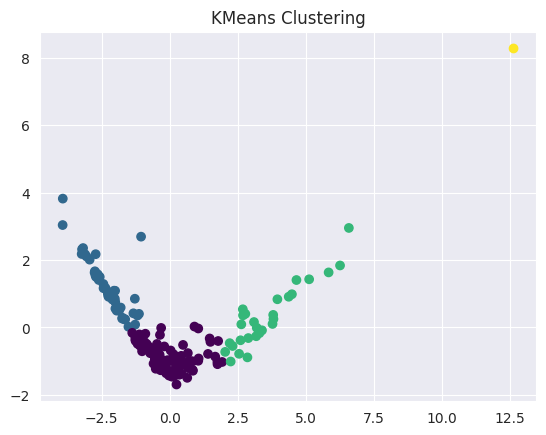

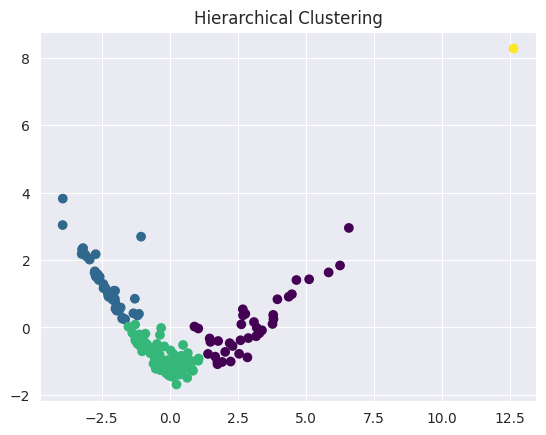

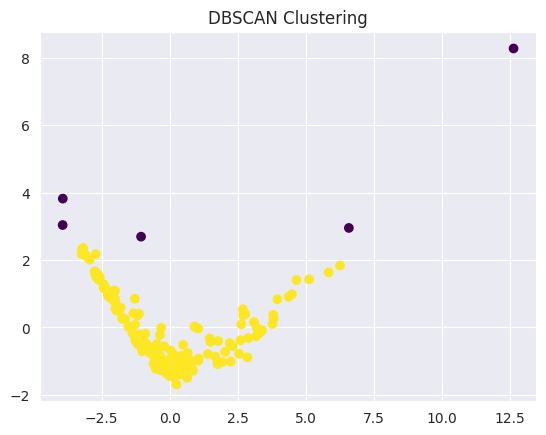

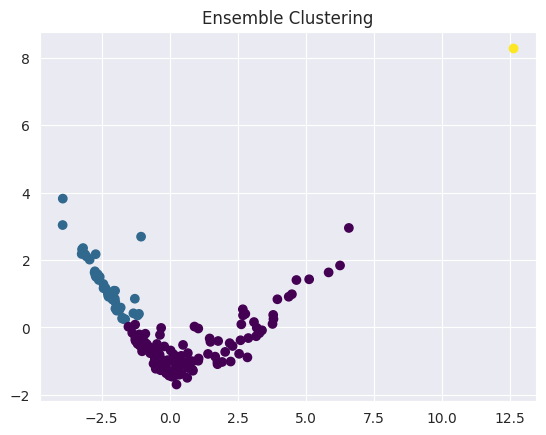

In [322]:
plt.scatter(data_pca[:,0], data_pca[:,1], c=kmeans.labels_, cmap='viridis')
plt.title('KMeans Clustering')
plt.show()

plt.scatter(data_pca[:,0], data_pca[:,1], c=hierarchical.labels_, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.show()

plt.scatter(data_pca[:,0], data_pca[:,1], c=dbscan.labels_, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

plt.scatter(data_pca[:,0], data_pca[:,1], c=ensemble_clusters, cmap='viridis')
plt.title('Ensemble Clustering')
plt.show()


## **Clusters of KMeans Algorithm**

In [323]:
# read data from CSV file
country_data = pd.read_csv('/content/Country-data.csv')

# add country column back to data DataFrame
data['country'] = country_data['country']

# Add the cluster labels to the DataFrame
data['cluster'] = kmeans.labels_

data[kmeans.labels_==0]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,cluster
1,16.6,1145.20,267.895,1987.74,9930,4.49,76.3,1.65,4090,Albania,0
2,27.3,1712.64,185.982,1400.44,12900,16.10,76.5,2.89,4460,Algeria,0
4,10.3,5551.00,735.660,7185.80,19100,1.44,76.8,2.13,12200,Antigua and Barbuda,0
5,14.5,1946.70,834.300,1648.00,18700,20.90,75.8,2.37,10300,Argentina,0
6,18.1,669.76,141.680,1458.66,6700,7.77,73.3,1.69,3220,Armenia,0
...,...,...,...,...,...,...,...,...,...,...,...
160,10.6,3129.70,993.650,3022.60,17100,4.91,76.4,2.08,11900,Uruguay,0
161,36.3,437.46,80.178,393.30,4240,16.50,68.8,2.34,1380,Uzbekistan,0
162,29.2,1384.02,155.925,1565.19,2950,2.62,63.0,3.50,2970,Vanuatu,0
163,17.1,3847.50,662.850,2376.00,16500,45.90,75.4,2.47,13500,Venezuela,0


In [324]:
data[kmeans.labels_==1]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,cluster
0,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,Afghanistan,1
3,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530,Angola,1
17,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,Benin,1
21,52.5,2768.6000,527.0500,3257.550,13300,8.920,57.1,2.88,6350,Botswana,1
25,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,Burkina Faso,1
26,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,Burundi,1
28,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310,Cameroon,1
31,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,Central African Republic,1
32,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897,Chad,1
36,88.2,126.8850,34.6819,397.573,1410,3.870,65.9,4.75,769,Comoros,1


In [325]:
data[kmeans.labels_==2]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,cluster
7,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900,Australia,2
8,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900,Austria,2
15,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400,Belgium,2
23,10.5,23792.2,1002.52,9884.0,80600,16.700,77.1,1.84,35300,Brunei,2
29,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400,Canada,2
42,3.6,15461.6,1838.76,17710.0,33900,2.010,79.9,1.42,30800,Cyprus,2
44,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000,Denmark,2
53,3.0,17879.4,4134.90,17278.8,39800,0.351,80.0,1.87,46200,Finland,2
54,4.2,10880.8,4831.40,11408.6,36900,1.050,81.4,2.03,40600,France,2
58,4.2,17681.4,4848.80,15507.8,40400,0.758,80.1,1.39,41800,Germany,2


In [326]:
data[kmeans.labels_==3]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,cluster
91,2.8,183750.0,8158.5,149100.0,91700,3.62,81.3,1.63,105000,Luxembourg,3


In [327]:
# Number of countries in each cluster
import numpy as np
np.unique(kmeans.labels_, return_counts=True)


(array([0, 1, 2, 3], dtype=int32), array([89, 49, 28,  1]))

## **Aid amount distribution among clusters**

In [328]:
# Calculate total need (i.e., GDP + health + social factor) for each cluster
cluster_totals = data.groupby('cluster').sum()
cluster_need = cluster_totals['gdpp'] + cluster_totals['health'] + cluster_totals['income']

# Calculate proportion of total aid needed for each cluster
cluster_prop = cluster_need / cluster_need.sum()

# Calculate total aid for all clusters
total_aid = 10000000

# Calculate aid amount for each cluster based on available funding and proportion of total need
cluster_aid_amount = total_aid * cluster_prop

# Print the total aid amount for each cluster
for i in range(len(cluster_aid_amount)):
    print('Cluster', i, ':', round(cluster_aid_amount[i], 2))


Cluster 0 : 3808628.4
Cluster 1 : 566283.08
Cluster 2 : 5231481.95
Cluster 3 : 393606.57


## **Calculating aid by giving each weights**

In [329]:
import pandas as pd

# Define weights for different factors
weights = {
    'gdpp': 0.4,
    'life_expec': 0.2,
    'total_fer': 0.1,
    'income': 0.15,
    'inflation': 0.05,
    'health': 0.1,
}

# Calculate score for each country
scores = []
for i in range(len(data)):
    score = 0
    for factor, weight in weights.items():
        # Apply inverse weighting to GDP per capita and income factors
        if factor in ['gdpp', 'income']:
            score += weight / data.loc[i, factor]
        else:
            score += weight * data.loc[i, factor]
    scores.append(score)

# Calculate aid needed for each country proportional to its score
total_aid = 10000000
aid_amounts = (total_aid * pd.Series(scores)) / sum(scores)

# Print aid amount for each country
for i in range(len(data)):
    print(data.loc[i, 'country'], ':', round(aid_amounts[i], 2))


Afghanistan : 8194.82
Albania : 21094.83
Algeria : 17393.31
Angola : 11838.32
Antigua and Barbuda : 44343.33
Argentina : 49642.5
Armenia : 14606.46
Australia : 233488.44
Austria : 264529.73
Azerbaijan : 24376.51
Bahamas : 117230.03
Bahrain : 58984.75
Bangladesh : 8618.42
Barbados : 71106.61
Belarus : 24262.73
Belgium : 244235.9
Belize : 18478.79
Benin : 7977.16
Bhutan : 13069.58
Bolivia : 12258.73
Bosnia and Herzegovina : 33169.93
Botswana : 32238.92
Brazil : 57834.31
Brunei : 58002.55
Bulgaria : 30809.51
Burkina Faso : 8143.75
Burundi : 7685.82
Cambodia : 9011.24
Cameroon : 9338.37
Canada : 274470.38
Cape Verde : 14081.89
Central African Republic : 5913.86
Chad : 8123.19
Chile : 59219.87
China : 19159.37
Colombia : 31370.3
Comoros : 8607.76
Congo, Dem. Rep. : 7872.15
Congo, Rep. : 10115.48
Costa Rica : 52678.8
Cote d'Ivoire : 9207.0
Croatia : 59754.73
Cyprus : 99461.17
Czech Republic : 85297.42
Denmark : 336732.98
Dominican Republic : 24530.5
Ecuador : 26612.25
Egypt : 13440.61
El Sal

## **Visualisation of distribution of aid among clusters**

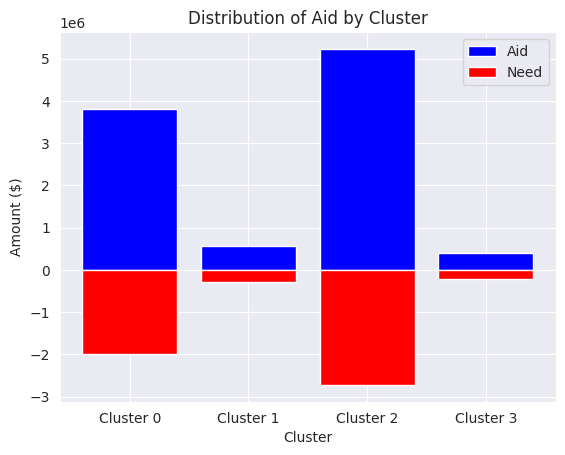

In [330]:
import matplotlib.pyplot as plt

# Calculate total aid for each cluster
cluster_aid = [cluster_aid_amount[0],cluster_aid_amount[1],cluster_aid_amount[2],cluster_aid_amount[3]]

# Plot stacked bar chart
plt.bar(range(len(cluster_aid)), cluster_aid, label='Aid', color='b')
plt.bar(range(len(cluster_need)), -cluster_need, label='Need', color='r')
plt.xticks(range(len(cluster_aid)), ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.xlabel('Cluster')
plt.ylabel('Amount ($)')
plt.title('Distribution of Aid by Cluster')
plt.legend()
plt.show()


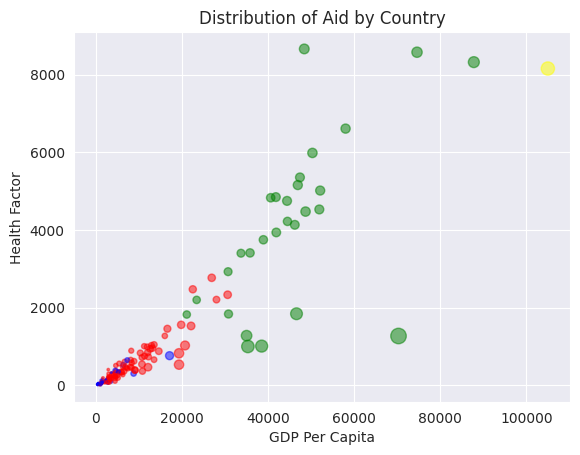

In [331]:
import matplotlib.pyplot as plt

# Create a scatter plot to visualize aid distribution for each country
colors = ['red', 'blue', 'green', 'yellow']
cluster_colors = [colors[i] for i in kmeans.labels_]
plt.scatter(x=data['gdpp'], y=data['health'], c=cluster_colors, s=data['income']*0.001, alpha=0.5)
plt.title('Distribution of Aid by Country')
plt.xlabel('GDP Per Capita')
plt.ylabel('Health Factor')
plt.show()
